**Idea:**
    Our team was interested in seeing who was more prone to commute whether women or me using citibikes to go to their daily routines.For that purpouse we analyzed the commute hours of early morning (from 7-10) and evening (from 4 -7pm). Our level of significance is 0.05
    
**H0:** In 2015, there was an equal or smaller ratio of female Citi Bike users commuting in the evening vs. the morning 
compared to their male counterparts, significance level = 0.05.

**H0 Equation:** 

$$\frac{Evening Female Commuters}{Morning Female Commuters} =< \frac{Evening Male Commuters}{Morning Male Commuters}$$

**Ha:** In 2015, a larger ratio of female Citi Bike users commuting in the evening vs. the morning compared to their male 
counterparts. 

**Ha Equation:** 

$$\frac{Evening Female Commuters}{Morning Female Commuters} > \frac{Evening Male Commuters}{Morning Male Commuters}$$

In [16]:
from __future__ import print_function, division
import os
import sys
import numpy as np
import pandas as pd
import pylab as pl
import zipfile
import datetime as dt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
#from working with Shay
def getCitiBikeCSV(datestring):
    """the code from the citibikes gender ipython notebook wasn't working for us so we created a 
    new function to download and open the csv using the ZipFile module"""
    print ("Downloading", datestring) 
    !curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"
    zf = zipfile.ZipFile(datestring + '-citibike-tripdata.zip', 'r')
    zf.extractall(os.getenv('PUIDATA'))
    file_path = os.getenv('PUIDATA') + '/' + datestring + '-citibike-tripdata.csv'
    df = pd.read_csv(file_path, parse_dates=['starttime'])
    return df

datestring = '201502'
data= getCitiBikeCSV(datestring)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4708k  100 4708k    0     0  6809k      0 --:--:-- --:--:-- --:--:-- 8751k


In [18]:
data.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [19]:
df=data.drop([u'tripduration', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year'],axis=1)

In [20]:
df.head()

,starttime,gender
0,2015-02-01 00:00:00,2
1,2015-02-01 00:00:00,1
2,2015-02-01 00:01:00,2
3,2015-02-01 00:01:00,2
4,2015-02-01 00:01:00,1


In [21]:
df['date'] = pd.to_datetime(df['starttime'])

In [22]:
#http://stackoverflow.com/questions/24813673/split-datetime-column-into-a-date-and-time-python
df['Time'],df['Date'] = df['date'].apply(lambda x:x.time()),df['date'].apply(lambda x:x.date())

In [23]:
def morn_eve(data): 
    #generates 1 for Morning, 2 for Evening, 3 for not
    col_num = data.gender.count()
    bands = []
    morn_start = dt.time(hour = 7)
    morn_end = dt.time(hour = 10)
    eve_start = dt.time(hour = 16)
    eve_end = dt.time(hour = 19)
    for x in range(col_num):
        if data.Time[x] >= morn_start and data.Time[x] <= morn_end:
            bands.append(1)
        elif data.Time[x] >= eve_start and data.Time[x] <= eve_end:
            bands.append(2)
        else: 
            bands.append(float('NaN'))
    data['morn_eve']= bands
    return data

In [24]:
df= morn_eve(df)

In [25]:
df.dropna(axis = 0, inplace = True)
df.reset_index()
df2 = df[df['date'].dt.weekday < 5]
#index_to_drop = list(data2.filter(data2['date'].dt.weekday > 5).T)

In [26]:
df2.reset_index(inplace= True)
df2

,index,starttime,gender,date,Time,Date,morn_eve
0,6558,2015-02-02 07:00:00,1,2015-02-02 07:00:00,07:00:00,2015-02-02,1.0
1,6559,2015-02-02 07:00:00,1,2015-02-02 07:00:00,07:00:00,2015-02-02,1.0
2,6560,2015-02-02 07:01:00,1,2015-02-02 07:01:00,07:01:00,2015-02-02,1.0
3,6561,2015-02-02 07:01:00,1,2015-02-02 07:01:00,07:01:00,2015-02-02,1.0
4,6562,2015-02-02 07:03:00,1,2015-02-02 07:03:00,07:03:00,2015-02-02,1.0
5,6563,2015-02-02 07:03:00,2,2015-02-02 07:03:00,07:03:00,2015-02-02,1.0
6,6564,2015-02-02 07:06:00,1,2015-02-02 07:06:00,07:06:00,2015-02-02,1.0
7,6565,2015-02-02 07:07:00,1,2015-02-02 07:07:00,07:07:00,2015-02-02,1.0
8,6566,2015-02-02 07:07:00,1,2015-02-02 07:07:00,07:07:00,2015-02-02,1.0
9,6567,2015-02-02 07:08:00,1,2015-02-02 07:08:00,07:08:00,2015-02-02,1.0


NameError: name 'label_names' is not defined

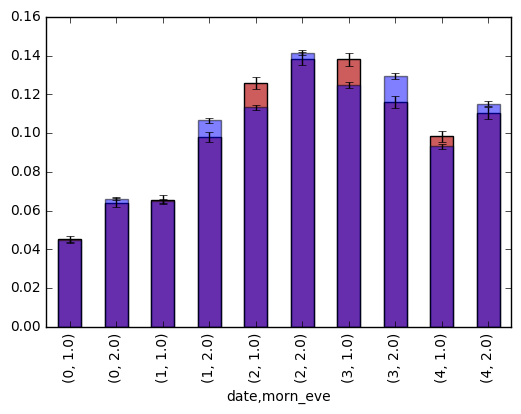

In [27]:
#I followed Shay intructions, understanding the process
norm_w = counts_w.sum()
nor_w = 1
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m)/norm_m,(error_m)/norm_m)], label='men bikers')
ax.xaxis.set_ticklabels(label_names, fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day and time of the week")

pl.legend(['women bikers','men bikers'],fontsize=20)

### Figure 1:  Distribution of users by gender and commute hours in February 2015

NameError: name 'label_names' is not defined

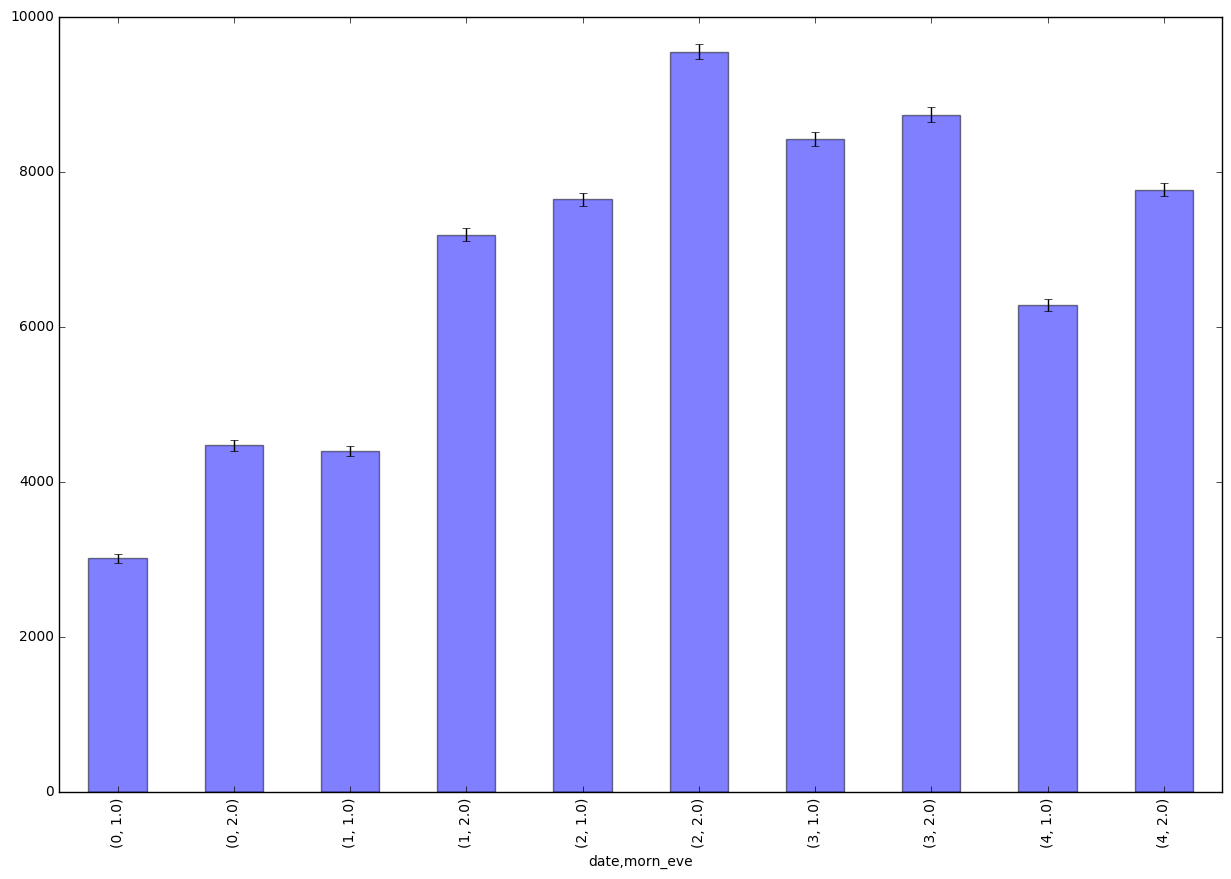

In [28]:
fig=pl.figure(figsize(15,10))

counts_w = df2['date'][df2['gender'] == 2].groupby([df2['date'].dt.weekday, df2['morn_eve']]).count()

error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  
                              yerr=[((error_w) / norm_w, (error_w) / norm_w)], label='female bikers')

counts_m = df2['date'][df2['gender'] == 1].groupby([df2['date'].dt.weekday, df2['morn_eve']]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], label='men bikers')
ax.xaxis.set_ticklabels(label_names, fontsize=20)
ax.set_ylabel ("Number of rides",fontsize=20)
ax.set_xlabel ("Day and time of the work week",fontsize=20)
pl.legend(['female bikers','male bikers'],fontsize=20,loc='upper right',bbox_to_anchor=(1.3,1))
pl.show()

### Figure 2: Normalized Distribution of users by gender and commute hours in February 2015

In [ ]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])
morn_w = sum(counts_w[::2]) * 1.0 / norm_w
eve_w = sum(counts_w[1::2]) * 1.0 / norm_w
emorn_w = np.sqrt(sum(error_w[::2]**2)) / norm_w
eeve_w = np.sqrt(sum(error_w[1::2]**2)) / norm_w

morn_m = sum(counts_m[:-2]) * 1.0 / norm_m
eve_m = sum(counts_m[-2:]) * 1.0 / norm_m
emorn_m = np.sqrt(sum(error_m[::2]**2)) / norm_m
eeve_m = np.sqrt(sum(error_m[1::2]**2)) / norm_m

print("Men: morning:{0:.3f}, evening:{1:.3f}, morning error:{2:.3f}, evening error:{3:.3f}"\
      .format(morn_m, eve_m, emorn_m, eeve_m))
print("Women: morning:{0:.3f}, evening:{1:.3f}, morning error:{2:.3f}, evening error:{3:.3f}"\
      .format(morn_w, eve_w, emorn_w, eeve_w))

ax1.errorbar([0.4], [morn_m], yerr=[emorn_m], fmt='o', label='men')
ax1.errorbar([0.2], [morn_w], yerr=[emorn_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [eve_m], yerr=[eeve_m], fmt='o', label='men')
ax2.errorbar([0.2], [eve_w], yerr=[eeve_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax1.set_title("mornings")
ax2.set_title("evenings")
ax2.set_ylabel("Fraction of normalized rides by gender")
ax1.set_ylabel("Fraction of normalized rides by gender")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

### Figure 3: The figure shows the ratio of normalized Citibike bikers by morning / evening rides

I would analize Ztest:

In [ ]:
P0mP1 = eve_w- eve_m
print ("difference between man and women on weekend: ", P0mP1)
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

In [ ]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

In [ ]:
sp_stdev_mw= se(p(eve_w, eve_m, norm_w, norm_m), norm_w, norm_m)
# print (sp_stdev_mw)
z06 = zscore(eve_w, eve_m, sp_stdev_mw)
print ("The z statistics is %.2f"%z06)